### Cho dữ liệu shopping_data.csv, thực hiện việc phân khúc khách hàng của một nhà phân phối bán buôn dựa trên chi tiêu hàng năm của khách hàng cho các danh mục sản phẩm đa dạng như fresh, milk, grocery... bằng thuật toán Hierarchical Clustering dựa trên các thuộc tính được cung cấp
* Đọc dữ liệu, chuẩn hóa dữ liệu nếu cần
* Dùng dendrogram để xác định số nhóm/cụm
* Áp dụng thuật toán
* Trực quan hóa kết quả, nhận xét
* customer_data.head()# Loại bỏ outlier
from scipy.stats import zscore(Theo: http://stackabuse.com/hierarchical-clustering-with-python-and-scikit-learn/ (http://stackabuse.com/hierarchical-clustering-with-python-and-scikit-learn/))

In [1]:
import matplotlib.pyplot as plt
import pandas as pd
%matplotlib inline
import numpy as np
import seaborn as sns

In [2]:
customer_data = pd.read_csv('../../Data/Wholesale_customers.csv')
customer_data.shape

(440, 8)

In [3]:
customer_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 440 entries, 0 to 439
Data columns (total 8 columns):
 #   Column            Non-Null Count  Dtype
---  ------            --------------  -----
 0   Channel           440 non-null    int64
 1   Region            440 non-null    int64
 2   Fresh             440 non-null    int64
 3   Milk              440 non-null    int64
 4   Grocery           440 non-null    int64
 5   Frozen            440 non-null    int64
 6   Detergents_Paper  440 non-null    int64
 7   Delicassen        440 non-null    int64
dtypes: int64(8)
memory usage: 27.6 KB


In [4]:
customer_data.head()

,Channel,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
0,2,3,12669,9656,7561,214,2674,1338
1,2,3,7057,9810,9568,1762,3293,1776
2,2,3,6353,8808,7684,2405,3516,7844
3,1,3,13265,1196,4221,6404,507,1788
4,2,3,22615,5410,7198,3915,1777,5185


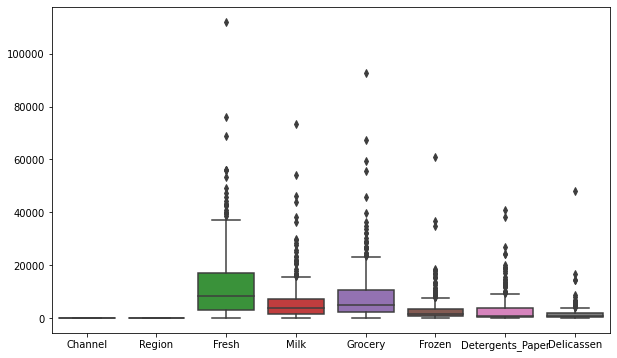

In [5]:
plt.figure(figsize=(10,6))
sns.boxplot(data=customer_data)
plt.show()

In [6]:
# Loại bỏ outlier
from scipy.stats import zscore

In [7]:
z_scores = zscore(customer_data)
abs_z_scores = np.abs(z_scores)
filtered_entries = (abs_z_scores < 3).all(axis=1)
new_df = customer_data[filtered_entries]

In [8]:
new_df.head()

,Channel,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
0,2,3,12669,9656,7561,214,2674,1338
1,2,3,7057,9810,9568,1762,3293,1776
2,2,3,6353,8808,7684,2405,3516,7844
3,1,3,13265,1196,4221,6404,507,1788
4,2,3,22615,5410,7198,3915,1777,5185


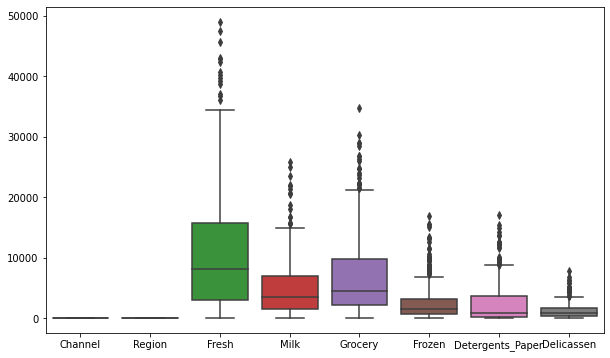

In [9]:
plt.figure(figsize=(10,6))
sns.boxplot(data=new_df)
plt.show()

In [10]:
new_df.shape

(414, 8)

Với dữ liệu trên, nếu không loại bỏ outlier thì cần scale dữ liệu với RobustScaler. Còn không thì có thể scale với normalize hoặc MinMaxScaler

In [11]:
from sklearn.preprocessing import normalize, RobustScaler, MinMaxScaler

In [12]:
# x = MinMaxScaler()
# x.fit(new_df)
# data_scaled = x.transform(new_df)
data_scaled = normalize(new_df)
data_scaled = pd.DataFrame(data_scaled, columns=customer_data.columns)
data_scaled.head()

,Channel,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
0,0.000112,0.000168,0.708333,0.539874,0.422741,0.011965,0.149505,0.074809
1,0.000125,0.000188,0.442198,0.614704,0.599540,0.110409,0.206342,0.111286
2,0.000125,0.000187,0.396552,0.549792,0.479632,0.150119,0.219467,0.489619
3,0.000065,0.000194,0.856837,0.077254,0.272650,0.413659,0.032749,0.115494
4,0.000079,0.000119,0.895416,0.214203,0.284997,0.155010,0.070358,0.205294


Cần xác định các tiêu chí và thuộc tính sẽ đưa vào phân nhóm

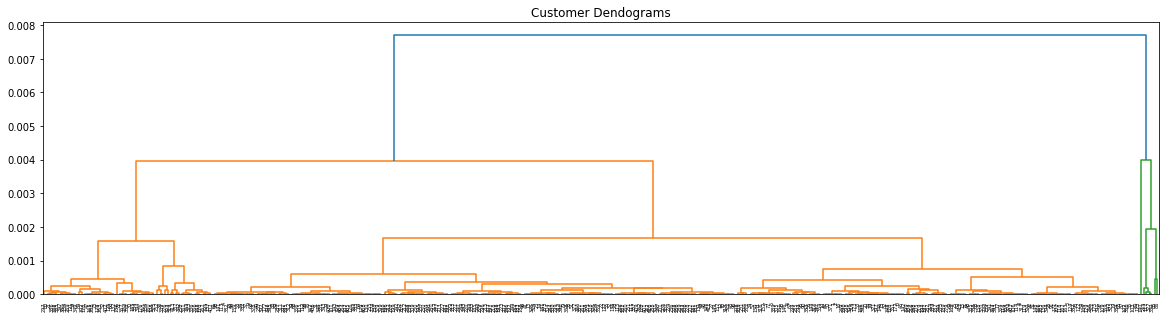

In [23]:
from scipy.cluster import hierarchy

plt.figure(figsize=(20, 5))
plt.title("Customer Dendograms")
dend = hierarchy.dendrogram(hierarchy.linkage(data_scaled[['Channel', 'Region']], method='ward'))
plt.axhline(y=6, color='r', linestyle='--')
plt.show()

In [16]:
# cluster = 2
from sklearn.cluster import AgglomerativeClustering
cluster = AgglomerativeClustering(n_clusters = 2,
affinity='euclidean',
linkage='ward')

cluster.fit(data_scaled[['Channel', 'Region', 'Fresh', 'Milk']])

AgglomerativeClustering()

In [17]:
cluster.labels_

array([0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 0, 1, 0, 1, 1,
       1, 0, 1, 1, 1, 0, 1, 1, 0, 1, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0,
       0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0,
       1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0, 1,
       0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1,
       0, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 1, 1, 1, 0,
       1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0,
       1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1,
       1, 0, 1, 1, 0, 1, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0,
       1, 0, 1, 1, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 1, 1,
       1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 0, 0, 0, 1, 0, 1, 1, 1, 0, 1, 1, 0,
       0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 1, 1,
       1, 1, 1, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1,
       0, 0, 1, 0, 1, 1, 0, 1, 0, 1, 0, 0, 1, 1, 1,

In [18]:
import numpy as np
from collections import Counter

In [19]:
c = Counter(cluster.labels_)

In [20]:
c

Counter({0: 222, 1: 192})

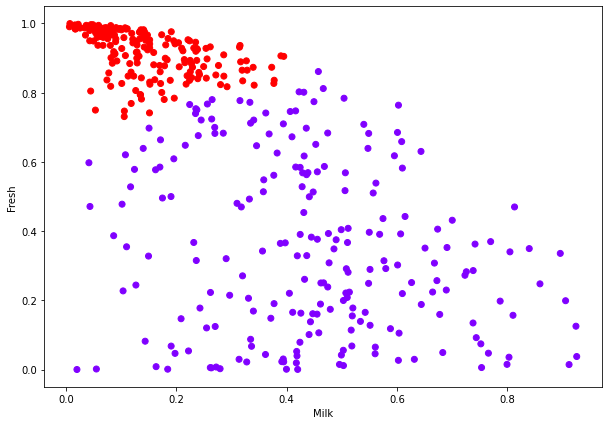

In [21]:
plt.figure(figsize=(10, 7))

plt.scatter(data_scaled['Milk'], data_scaled['Fresh'], c=cluster.labels_, cmap='rainbow')
plt.xlabel("Milk")
plt.ylabel("Fresh")
plt.show()

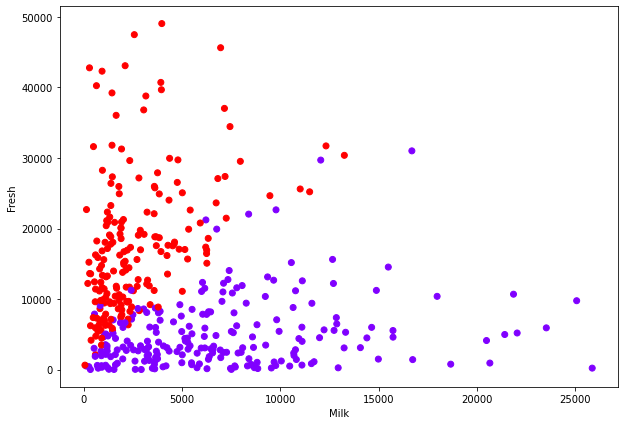

In [22]:
plt.figure(figsize=(10, 7))
plt.scatter(new_df['Milk'], new_df['Fresh'], c=cluster.labels_, cmap='rainbow')
plt.xlabel("Milk")
plt.ylabel("Fresh")
plt.show()